🚀 Initializing VolSense.Forecast (model=v6a)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 2 tickers...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Forecasting: 100%|██████████| 2/2 [00:00<00:00, 29.02it/s]


✅ Forecast complete.
  ticker  realized_vol  pred_vol_1  pred_vol_5  pred_vol_10  vol_diff  \
0   AAPL      0.242985    0.368003    0.341189     0.302170  0.125018   
1   MSFT      0.149536    0.281498    0.264603     0.230117  0.131961   

   vol_direction  
0            1.0  
1            1.0  


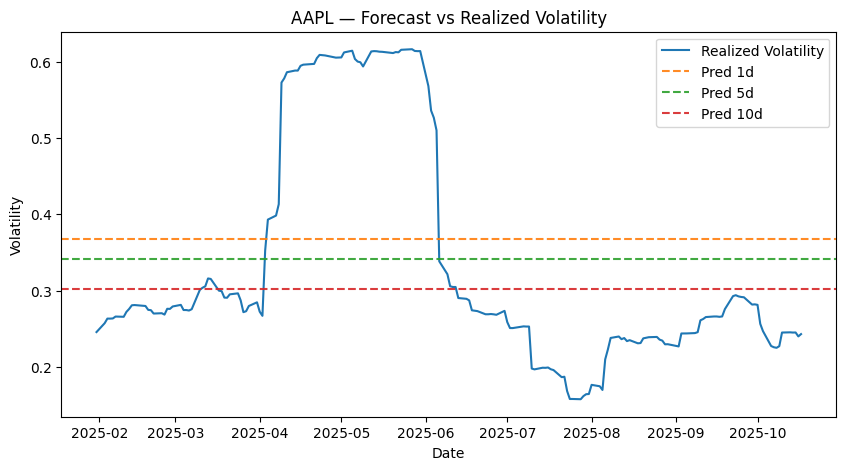

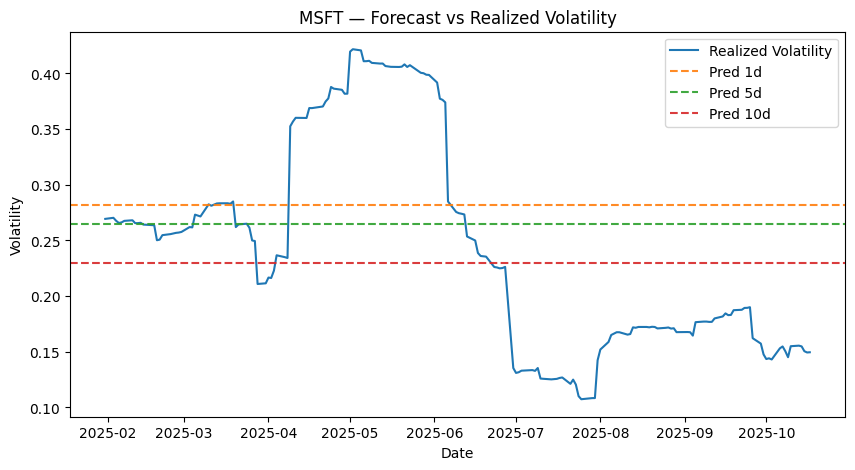

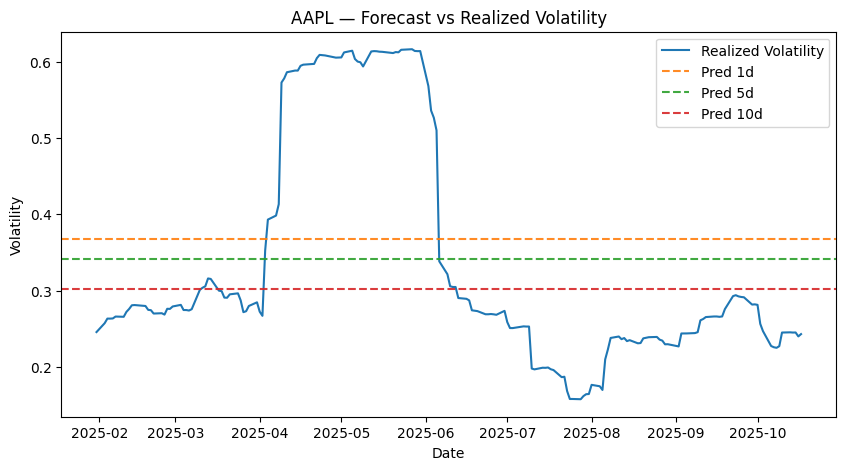

In [1]:
from volsense_inference.forecast_engine import Forecast

# Initialize once
fcast = Forecast(model_version="v6a", checkpoints_dir="models")

# Run forecasts
preds = fcast.run(["AAPL", "MSFT"])
print(preds)


fcast.plot("MSFT")
fcast.plot("AAPL")

🚀 Initializing VolSense.Forecast (model=v6a)
✔ Window=40, Horizons=[1, 5, 10]

🌍 Running forecasts for 5 tickers...



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Forecasting: 100%|██████████| 5/5 [00:00<00:00, 49.60it/s]


✅ Forecast complete.
  ticker  realized_vol  forecast_vol  f/r_ratio    zscore vol_regime
0   TSLA      0.501521      0.583552   1.163566  1.942131   High Vol
1   PYPL      0.359902      0.418144   1.161827  0.908156     Normal
2   AAPL      0.242985      0.341508   1.405471  0.429102     Normal
3   MSFT      0.149536      0.264826   1.770982 -0.050238     Normal
4    SPY      0.110371      0.163458   1.480984 -0.683895    Low Vol
AAPL: 5-day vol ↑ rising (+0.43σ vs peers), regime: Normal.
MSFT: 5-day vol ↑ rising (-0.05σ vs peers), regime: Normal.
TSLA: 5-day vol ↑ rising (+1.94σ vs peers), regime: High Vol.


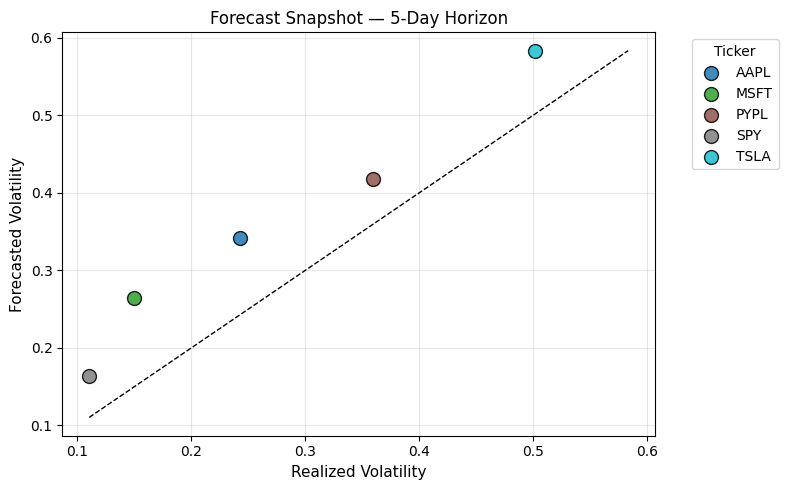

In [1]:
from volsense_inference.forecast_engine import Forecast
from volsense_inference.analytics import Analytics

# Generate forecasts
fcast = Forecast(model_version="v6a", checkpoints_dir="models")
preds = fcast.run(["AAPL", "MSFT", "TSLA", "SPY", "PYPL"])

# Create analytics snapshot
analytics = Analytics(preds)
analytics.compute()

# Trader summary table
print(analytics.summary())

# Human-readable signals
print(analytics.describe("AAPL"))
print(analytics.describe("MSFT"))
print(analytics.describe("TSLA"))

# Quick scatter plot
analytics.plot("pred_vol_5")